<a href="https://colab.research.google.com/github/twindragoon/Prog2kakushin/blob/main/work1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

これはpandasのものです。　
pandasでは

> 自作のルーレット（１～３６と０，００があるやつ）を用いてデータ解析をしたいと思っています。（だいぶアバウトだなｗ



と思っていたのですが、いい感じの過去作が見つかったので
>　過去作の一つである「ドラゴニックガラポン」というメダルゲーム＋ガラポン風のものについてスランプグラフやその他統計データを表示するプログラムに変更。

簡単なゲームフローを解説する。
>  * 1st 通常時はJackpotChanceを狙え。
>  * 2nd JackpotChance中は初期回数は２回。回数がなくなる前に２回JPステップをためればJP獲得となる。JP獲得後もチャンスはあり、JPステップをさらに獲得するごとにJPの倍率分を獲得できる。また、２５回を突破した時点で完走ボーナスである「JPの倍率×1.5～5倍」を受け取り終了となる。




今回制作したものである。

> 以下が取扱説明書となっている。使う前に一度目を通してほしい。
>>　それぞれの関数の説明
*   JPup=プログレッシブJPの上昇値を定義する関数だ。
*   JPC=JackpotChanceの配当などを決定する関数だ。初期２回で回数がなくなるか２５回継続で終了だ。
*   DGN=通常時の配当を決定する関数だ。ここでJPCを引けばJPC関数でのJackpotChanceだ。






JP! 16.0倍,Total64.0倍で獲得！
Total2.5倍
JP! 35.75倍,Total50.25倍で獲得！
Total1.5倍
Total9.5倍
Total5.5倍
Total2.0倍
Total3.5倍
Total6.5倍
Total3.0倍
Total2.0倍
Total3.0倍
Total2.0倍
Total3.0倍
Total5.0倍
Total7.5倍
Total1.5倍
Total2.0倍
Total2.0倍
Total4.0倍
JP! 126.5倍,Total134.0倍で獲得！
Total9.0倍
Total6.5倍
Total4.0倍
Total3.0倍
Total3.0倍
JP! 68.0倍,Total80.5倍で獲得！
Total1.5倍
Total2.5倍
Total6.5倍
Total8.0倍
JP! 36.75倍,Total204.25倍で獲得！
Total4.0倍
Total1.0倍
Total1.0倍
Total5.0倍
Total2.0倍
Total2.5倍
Total3.0倍


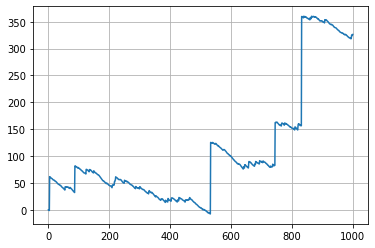

,JPCはまり,スランプグラフ
0,0.0,0.0
1,1.0,0.0
2,2.0,-0.5
3,3.0,-1.3
4,0.0,61.7
...,...,...
996,84.0,324.5
997,85.0,323.7
998,0.0,325.7
999,1.0,326.2


In [ ]:
#DGの定義(今回はシミュレーションでやるのでラストにDf使って収納)
import pandas as pd
from random import randint as rd
from random import randrange as rr
import pandas
from matplotlib import pyplot as plt
def JPup(item=0):
  if item!=0:
    up=0.25
  else:
    up=0.05
  return up
def JPC(bet,JP):
  hait=0 #tuika
  jp=0
  spjp=0
  balls=2
  step=0
  nowball=0
  spjphaihai=0
  hai=0
  while nowball<=24:       
    st=rd(1,100)
    nd=rd(1,100)
    if balls<=0:
      hait+=hai
      break
    if nd<=60:
      #print('+0')
      balls+=-1
    elif nd<=65:
      #print('+3')
      balls+=2
    elif nd<=90:
      #print('+1')
      balls+=0
    else:
      #print('+2')
      balls+=1    
    nowball+=1
    if st<=35:
      #print('0.5倍')
      hai+=0.5
    elif st<=60:
      #print('1.0倍')
      hai+=1.0
    elif st<=80:
      #print('1.5倍')
      hai+=1.5
    elif st<=90:
      #print('2.0倍')
      hai+=2.0
    else:
      #print('JPstep get')
      step+=1
      if balls<=1:
        balls+=1
      if step>=2:
        hai+=JP
    #print('残り',balls,'球')
    if step>=2:
      jp+=1
    if nowball==25:      
      spjp+=1
      jp+=1
      spjphaihai=JP*(rr(15,51,5)/10)
      hai+=spjphaihai
      #print(spjphaihai)     #spjphai*a tuika
  #print(jp)
  if jp!=0:
    return 1,hai,step,spjp,spjphaihai
  else:
    return 0,hai,step,spjp,spjphaihai #haiか?
def DGN(times,bet=5.0,item=0,JPs=20):
  df1=pd.DataFrame([[0,0]])
  df1.columns=['JPCはまり','スランプグラフ']
  df2=pd.DataFrame([[0,0,0,0]])
  df2.columns=['JPCトータル倍率','JPsteps','JP倍率','完走ボーナスの倍率']
  hai=0
  JPsyoki=JPs
  JPuphai=0
  nowgame=0
  hamari=0
  for t in range(0,times):
    st=rd(1,120)
    JPuphai+=JPup(item)
    a=0
    b=0
    c=0
    nowgame+=1
    hamari+=1
    if st<=45:
      #print('0.2倍')
      hai+=0.2
    elif st<=73:
      #print('0.5倍')
      hai+=0.5
    elif st<=93:
      #print('0.8倍')
      hai+=0.8
    elif st<=105:
      #print('1.0倍')
      hai+=1.0
    elif st<=110:
      #print('1.5倍')
      hai+=1.5
    elif st<=113:
      #print('2.0倍')
      hai+=2.0
    elif st<=115:
      #print('5.0倍')
      hai+=5.0
    elif st<=116:
      #print('7.0倍')
      hai+=7.0
    else:
      JP=JPsyoki+JPuphai
      #print('JPC!')
      #if item>0:
        #a=JPC(bet,JP)
        #if a[0]==1:
          #print('JP!',f'{JP}倍,Total{a[1]}倍で獲得！')
          #JPuphai=0 
        #else:
          #print(f'Total{a[1]}倍')
        #hamari=0
        #hai+=a[1]
      
      b=JPC(bet,JP)
      if b[0]==1:
        print('JP!',f'{JP}倍,Total{b[1]}倍で獲得！')
        JPuphai=0
      else:
        print(f'Total{b[1]}倍')
      hai+=round(b[1],2)
      df2=df2.append({'JPCトータル倍率':b[1],'JPsteps':b[2],'JP倍率':JP,'完走ボーナスの倍率':b[3]*b[4]},ignore_index=True)
      hamari=0
    nowgame=0
    hai=round(hai,2)
    df1=df1.append({'JPCはまり':hamari,'スランプグラフ':hai-(t+1)},ignore_index=True)
  return df1,df2

#OK(JPCは)
JPC(50,10)
xtimes=int(input('何G分のシミュレーションをしますか：'))
docsv=int(input('CSVファイルに保存しますか（１=YES）:'))
dfdf,dfdf2=DGN(xtimes,5,1,15)
x=range(xtimes+1)
plt.plot(x,dfdf['スランプグラフ'])
plt.grid()
plt.show()
if docsv==1:
  dfdf.to_csv(f'Dragonic Garapon {xtimes}plays.csv')
  dfdf2.to_csv(f'Dragonic Garapon {xtimes}´sJPC.csv')
dfdf